In [21]:
import numpy as np
import nltk 
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import cufflinks as cf
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
cf.go_offline();
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
init_notebook_mode(connected = True)
pd.set_option('display.max_columns', None)

In [22]:
df = pd.read_csv("amazon.csv")
df.tail()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0
4914,4914,Zza,5,I've heard bad things about this 64gb Micro SD...,01-02-2014,310,0,0,0,0,0.0,0.0


In [23]:
df = df.sort_values("wilson_lower_bound", ascending = False)
df.drop('Unnamed: 0', inplace = True, axis = 1)

In [24]:
def missing(df):
    na_columns = [col for col in df.columns if df[col].isnull().sun() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending = True)
    ratio = (df[na_colomns].isnull().sum() / df.shape[0]* 100).sort_values(ascending = True)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis = 1, keys = ['Missing Values', 'Ratio'])
    return missing_df

def check_dataframe(df, head=5, tail=5):
    print("DATAFRAME INFO".center(82, '~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    
    print("TYPES".center(82, '~'))
    print(df.dtypes)
    
    print("MISSING VALUES".center(82, '~'))
    print(df.isnull().sum())
    
    print("DUPLICATED VALUES".center(82, '~'))
    print(df[df.duplicated()])
    
    print("HEAD".center(82, '~'))
    print(df.head(head))
    
    print("TAIL".center(82, '~'))
    print(df.tail(tail))

check_dataframe(df)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DATAFRAME INFO~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 4915
Columns: 11
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
reviewerName             object
overall                   int64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~MISSING VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~

In [25]:
constraints = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#800080']

def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Countplot', 'Percentage'), specs=[[{"type": "xy"}, {"type": "domain"}]])

    fig.add_trace(go.Bar(y=df[column_name].value_counts().values.tolist(),
                         x=[str(i) for i in df[column_name].value_counts().index],
                         text=df[column_name].value_counts().values.tolist(),
                         name=column_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=constraints),  
                         ), row=1, col=1)

    fig.add_trace(go.Pie(labels=df[column_name].value_counts().index,
                         values=df[column_name].value_counts().values,
                         textfont=dict(size=18),
                         textposition='auto',
                         showlegend=False,
                         name=column_name,
                         marker=dict(colors=constraints),  
                         ), row=1, col=2)

    fig.update_layout(title={"text": column_name, 'y': 0.9, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)


In [26]:
categorical_variable_summary(df, 'overall')

In [32]:
df.reviewText.head()

2031    [[ UPDATE - 6/19/2014 ]]So my lovely wife boug...
3449    I have tested dozens of SDHC and micro-SDHC ca...
4212    NOTE:  please read the last update (scroll to ...
317     If your card gets hot enough to be painful, it...
4672    Sandisk announcement of the first 128GB micro ...
Name: reviewText, dtype: object

In [33]:
review_example = df.reviewText[2020]
review_example

'I bought three of these--one to replace my old 1 GB card and two for first-time users to add to their phone memory. These cards work fine, and none of the three had any trouble.'

In [34]:
review_example  = re.sub('[^a-zA-Z]', ' ', review_example)
review_example

'I bought three of these  one to replace my old   GB card and two for first time users to add to their phone memory  These cards work fine  and none of the three had any trouble '

In [35]:
review_example = review_example.lower().split()
review_example

['i',
 'bought',
 'three',
 'of',
 'these',
 'one',
 'to',
 'replace',
 'my',
 'old',
 'gb',
 'card',
 'and',
 'two',
 'for',
 'first',
 'time',
 'users',
 'to',
 'add',
 'to',
 'their',
 'phone',
 'memory',
 'these',
 'cards',
 'work',
 'fine',
 'and',
 'none',
 'of',
 'the',
 'three',
 'had',
 'any',
 'trouble']

In [36]:
rt = lambda x: re.sub("[a-zA-Z]", ' ',str(x))
df['reviewText'] = df['reviewText'].map(rt)
df['reviewText'] = df['reviewText'].str.lower()
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,[[ - 6/19/2014 ]] ...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,- ...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,: ( ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,", ...",09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,128 ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


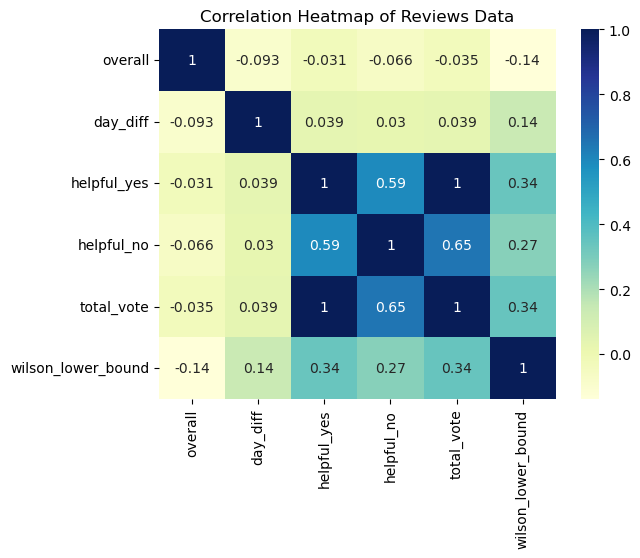

In [37]:
numeric_cols = ['overall', 'day_diff', 'helpful_yes', 'helpful_no', 'total_vote','wilson_lower_bound']
correlation_data = df[numeric_cols].corr()
sns.heatmap(correlation_data, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap of Reviews Data')
plt.show()


In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
df[['polarity', 'subjectivity']] = df['reviewText'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in df['reviewText'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    
    if neg > pos:
        df.loc[index, 'sentiment'] = 'Negative'
    elif pos > neg:
        df.loc[index, 'sentiment'] = 'Positive'
    else:
        df.loc[index, 'sentiment'] = 'Neutral'

In [39]:
df[df['sentiment'] == 'Positive'].sort_values("wilson_lower_bound", ascending=False).head(5)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
1461,DSh,5,"' , ' ...",09-05-2012,943,2,0,2,2,1.0,0.342380,0.500,1.0,Positive
2675,"Kevin Miguel ""Runs with scissors""",5,", ...",29-06-2013,527,1,0,1,1,1.0,0.206549,-0.125,1.0,Positive
1368,"D. Kronstadt ""kronhead""",5,", ...",25-03-2014,258,1,0,1,1,1.0,0.206549,0.500,1.0,Positive
2901,luis,5,:) ...,13-05-2013,574,1,0,1,1,1.0,0.206549,0.500,1.0,Positive
2792,Lauren Glenn,5,( ...,20-05-2013,567,1,0,1,1,1.0,0.206549,0.500,1.0,Positive


In [40]:
print(neu)

1.0


In [41]:
categorical_variable_summary(df,'sentiment')